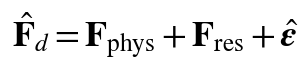

In [2]:
import matplotlib.pyplot as plt


def save_equation_figure(
    equation: str,
    fig_name: str,
    fontsize: int = 26,
    dpi: int = 1000,
    pad: float = 0.02,
    formats=("pdf", "svg", "png"),
):
    """
    Save a LaTeX-style (MathText) equation as a tightly cropped figure.

    Parameters
    ----------
    equation : str
        MathText equation string, INCLUDING $...$.
    fig_name : str
        Output file name WITHOUT extension.
    fontsize : int
        Font size for the equation.
    dpi : int
        DPI for PNG export.
    pad : float
        Padding around equation in inches.
    """

    # --- MathText only (NO external TeX) ---
    plt.rcParams.update({
        "text.usetex": False,
        "font.family": "serif",
        "mathtext.fontset": "stix",
    })

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis("off")

    # Place text (temporary)
    text = ax.text(
        0, 0,
        equation,
        fontsize=fontsize,
        ha="left",
        va="bottom",
    )

    # --- Force draw to get exact text size ---
    fig.canvas.draw()
    renderer = fig.canvas.get_renderer()
    bbox = text.get_window_extent(renderer=renderer)

    # Convert from pixels to inches
    width_in = bbox.width / fig.dpi
    height_in = bbox.height / fig.dpi

    # Resize figure to text size (+ tiny padding)
    fig.set_size_inches(width_in + pad, height_in + pad)

    # Reposition text after resize
    text.set_position((
        pad / (width_in + pad),
        pad / (height_in + pad),
    ))

    # --- Selective export ---
    for fmt in formats:
        fmt = fmt.lower()
        if fmt == "png":
            fig.savefig(
                f"{fig_name}.png",
                dpi=dpi,
                bbox_inches="tight",
                pad_inches=0,
                transparent=True,
            )
        elif fmt in ("pdf", "svg"):
            fig.savefig(
                f"{fig_name}.{fmt}",
                bbox_inches="tight",
                pad_inches=0,
                transparent=True,
            )
        else:
            raise ValueError(f"Unsupported format: {fmt}")

    plt.show()
    plt.close(fig)



eq = (
    r"$"
    r"\hat{\mathbf{F}}_d"
    r"="
    r"\mathbf{F}_{\mathrm{phys}}"
    r"+"
    r"\mathbf{F}_{\mathrm{res}}"
    r"+"
    r"\hat{\boldsymbol{\epsilon}}"
    r"$"
)



save_equation_figure(eq, "eqn_f_d_hat", formats=("png",))


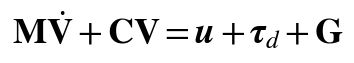

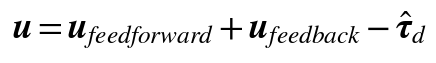

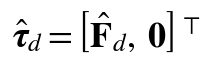

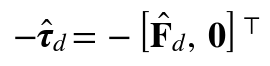

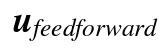

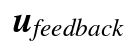

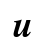

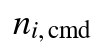

In [22]:
eq = (
    r"$"
    r"\mathbf{M}\dot{\mathbf{V}} + \mathbf{C}\mathbf{V}"
    r"= \boldsymbol{u} + \boldsymbol{\tau}_d + \mathbf{G}"
    r"$"
)

save_equation_figure(eq, "eqn_controller", formats=("png",))

eq = (
    r"$"
    r"\boldsymbol{u}"
    r"= \boldsymbol{u}_{feedforward} + \boldsymbol{u}_{feedback} - \hat{\boldsymbol{\tau}}_d"
    r"$"
)

save_equation_figure(eq, "eqn_controller_input", formats=("png",))

eq_tau_hat = (
    r"$"
    r"\hat{\boldsymbol{\tau}}_d"
    r"="
    r"\left["
    r"\hat{\mathbf{F}}_d,\;"
    r"\mathbf{0}"
    r"\right]^{\top}"
    r"$"
)


save_equation_figure(eq_tau_hat, "eqn_tau_hat", formats=("png", "svg"))

eq_negated_tau_hat = (
    r"$"
    r"-\hat{\boldsymbol{\tau}}_d"
    r"="
    r"-\left["
    r"\hat{\mathbf{F}}_d,\;"
    r"\mathbf{0}"
    r"\right]^{\top}"
    r"$"
)


save_equation_figure(eq_negated_tau_hat, "eqn_negated_tau_hat", formats=("svg", ))

symbol_ff = (
    r"$"
    r"\boldsymbol{u}_{feedforward}"
    r"$"
)

save_equation_figure(symbol_ff, "symbol_u_feedforward", formats=("svg", ))

symbol_fb = (
    r"$"
    r"\boldsymbol{u}_{feedback}"
    r"$"
)

save_equation_figure(symbol_fb, "symbol_u_feedback", formats=("svg", ))


symbol_u = (
    r"$"
    r"\boldsymbol{u}"
    r"$"
)

save_equation_figure(symbol_u, "symbol_u", formats=("svg", ))

symbol_n_i_cmd = (
    r"$"
    r"n_{i,\mathrm{cmd}}"
    r"$"
)

save_equation_figure(symbol_n_i_cmd, "symbol_n_i_cmd", formats=("svg", ))



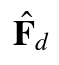

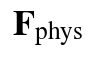

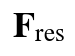

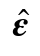

In [13]:
eq_Fd = (
    r"$"
    r"\hat{\mathbf{F}}_d"
    r"$"
)

eq_Fphys = (
    r"$"
    r"\mathbf{F}_{\mathrm{phys}}"
    r"$"
)

eq_Fres = (
    r"$"
    r"\mathbf{F}_{\mathrm{res}}"
    r"$"
)

eq_eps = (
    r"$"
    r"\hat{\boldsymbol{\epsilon}}"
    r"$"
)

save_equation_figure(eq_Fd,    "symbol_Fd_hat", formats=("png", "svg"))
save_equation_figure(eq_Fphys, "symbol_F_phys", formats=("png", "svg"))
save_equation_figure(eq_Fres,  "symbol_F_res",  formats=("png", "svg"))
save_equation_figure(eq_eps,   "symbol_epsilon_hat", formats=("png", "svg"))


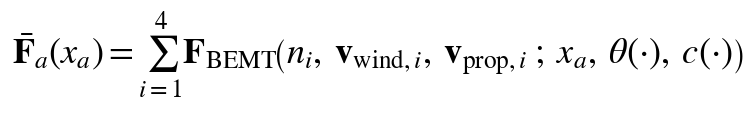

In [62]:
eq_bemt = (
    r"$"
    r"\bar{\mathbf{F}}_a(x_a)"
    r"="
    r"\sum_{i=1}^{4}"
    r"\mathbf{F}_{\mathrm{BEMT}}\!\left("
    r"n_i,\;"
    r"\mathbf{v}_{\mathrm{wind},i},\;"
    r"\mathbf{v}_{\mathrm{prop},i}"
    r"\;;\;"
    r"x_a,\;"
    r"\theta(\cdot),\;"
    r"c(\cdot)"
    r"\right)"
    r"$"
)
save_equation_figure(eq_bemt,    "eqn_bemt", formats=("png",))

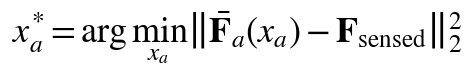

In [12]:
eq_param_id = (
    r"$"
    r"x_a^{*}"
    r"="
    r"\arg\min_{x_a}"
    r"\left\|"
    r"\bar{\mathbf{F}}_a(x_a)"
    r"-"
    r"\mathbf{F}_{\mathrm{sensed}}"
    r"\right\|_2^{2}"
    r"$"
)
save_equation_figure(eq_param_id,    "eqn_param_id", formats=("png",))

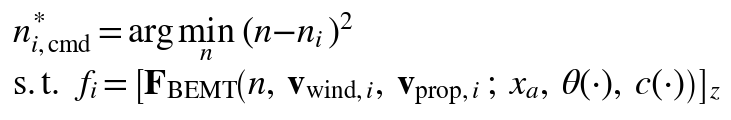

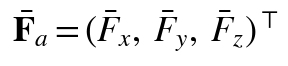

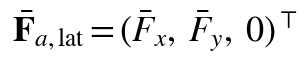

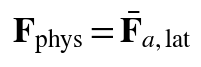

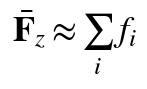

In [81]:
eq_thrust_matching = (
    r"$"
    r"n_{i,\mathrm{cmd}}^{*}"
    r"=\arg\min_{n}\;(n-n_i)^2"
    r"$"
    "\n"
    r"$"
    r"\mathrm{s.t.}\;\;"
    r"f_i"
    r"="
    r"\left[\mathbf{F}_{\mathrm{BEMT}}\!\left("
    r"n,\;"
    r"\mathbf{v}_{\mathrm{wind},i},\;"
    r"\mathbf{v}_{\mathrm{prop},i}"
    r"\;;\;"
    r"x_a,\;"
    r"\theta(\cdot),\;"
    r"c(\cdot)"
    r"\right)\right]_z"
    r"$"
)

save_equation_figure(
    eq_thrust_matching,
    "eqn_thrust_matching",
    formats=("png",),
)


symbol_f_a = (
    r"$"    
    r"\bar{\mathbf{F}}_a = (\bar{F}_x,\; \bar{F}_y,\; \bar{F}_z)^\top"
    r"$"    
)

save_equation_figure(symbol_f_a, "symbol_f_a", formats=("png",))

symbol_f_a_lat = (
    r"$"    
    r"\bar{\mathbf{F}}_{a,\mathrm{lat}}"
    r"= (\bar{F}_x,\; \bar{F}_y,\; 0)^\top"
    r"$"    
)

save_equation_figure(symbol_f_a_lat, "symbol_f_a_lat", formats=("png",))

symbol_f_phys = (
    r"$"    
    r"\mathbf{F}_{\mathrm{phys}} = \bar{\mathbf{F}}_{a,\mathrm{lat}}"
    r"$"    
)

save_equation_figure(symbol_f_phys, "symbol_f_phys", formats=("png",))

symbol_f_z = (
    r"$"    
    r"\bar{\mathbf{F}}_z \approx \sum_i \ f_i"
    r"$"    
)

save_equation_figure(symbol_f_z, "symbol_f_z", formats=("png",))




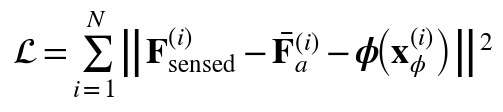

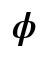

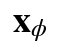

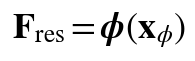

In [70]:
eq_ml_loss = (
    r"$"
    r"\mathcal{L}"
    r"="
    r"\sum_{i=1}^{N}"
    r"\left\|"
    r"\mathbf{F}_{\mathrm{sensed}}^{(i)}"
    r"-"
    r"\bar{\mathbf{F}}_a^{(i)}"
    r"-"
    r"\boldsymbol{\phi}\!\left(\mathbf{x}_\phi^{(i)}\right)"
    r"\right\|^{2}"
    r"$"
)
save_equation_figure(
    eq_ml_loss,
    "eqn_ml_loss",
    formats=("png",),
)


symbol_phi = (
    r"$"
    r"\boldsymbol{\phi}"
    r"$"
)
symbol_x_phi = (
    r"$"
    r"\mathbf{x}_\phi"
    r"$"
)
eq_res = (
    r"$"
    r"\mathbf{F}_{\mathrm{res}} = \boldsymbol{\phi}(\mathbf{x}_\phi)"
    r"$"
)

save_equation_figure(
    symbol_phi,
    "symbol_phi",
    formats=("png",),
)
save_equation_figure(
    symbol_x_phi,
    "symbol_x_phi",
    formats=("png",),
)
save_equation_figure(
    eq_res,
    "eqn_res",
    formats=("png",),
)

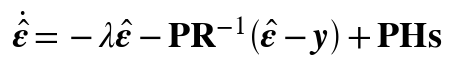

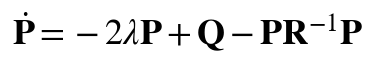

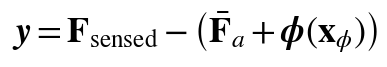

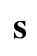

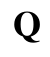

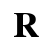

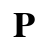

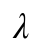

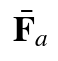

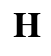

In [8]:
eq_adaptation_1 = (
    # ---- Adaptation law ----
    r"$"
    r"\dot{\hat{\boldsymbol{\epsilon}}}"
    r"="
    r"-\lambda \hat{\boldsymbol{\epsilon}}"
    r"-\mathbf{P}\mathbf{R}^{-1}\left(\hat{\boldsymbol{\epsilon}}-\boldsymbol{y}\right)"
    r"+\mathbf{P}\mathbf{H}\mathbf{s}"
    r"$"
)
eq_adaptation_2 = (
    # ---- Covariance update ----
    r"$"
    r"\dot{\mathbf{P}}"
    r"="
    r"-2\lambda\mathbf{P}"
    r"+\mathbf{Q}"
    r"-\mathbf{P}\mathbf{R}^{-1}\mathbf{P}"
    r"$"
)
eq_adaptation_3 = (
    # ---- Measured residual ----
    r"$"
    r"\boldsymbol{y}"
    r"="
    r"\mathbf{F}_{\mathrm{sensed}}"
    r"-\left(\bar{\mathbf{F}}_a+\boldsymbol{\phi}(\mathbf{x}_\phi)\right)"
    r"$"
)

save_equation_figure(
    eq_adaptation_1,
    "eqn_adaptation_1",
    formats=("png",),
)
save_equation_figure(
    eq_adaptation_2,
    "eqn_adaptation_2",
    formats=("png",),
)
save_equation_figure(
    eq_adaptation_3,
    "eqn_adaptation_3",
    formats=("png",),
)


symbol_s = (
    r"$"
    r"\mathbf{s}"
    r"$"
)

symbol_q = (
    r"$"
    r"\mathbf{Q}"
    r"$"
)

symbol_p = (
    r"$"
    r"\mathbf{P}"
    r"$"
)

symbol_r = (
    r"$"
    r"\mathbf{R}"
    r"$"
)

symbol_lambda = (
    r"$"
    r"\lambda"
    r"$"
)

symbol_f_a_bar = (
    r"$"
    r"\bar{\mathbf{F}}_a"
    r"$"
)

symbol_h = (
    r"$"
    r"\mathbf{H}"
    r"$"
)

save_equation_figure(
    symbol_s,
    "symbol_s",
    formats=("png",),
)
save_equation_figure(
    symbol_q,
    "symbol_Q",
    formats=("png",),
)
save_equation_figure(
    symbol_r,
    "symbol_R",
    formats=("png",),
)
save_equation_figure(
    symbol_p,
    "symbol_P",
    formats=("png",),
)
save_equation_figure(
    symbol_lambda,
    "symbol_lambda",
    formats=("png",),
)
save_equation_figure(
    symbol_f_a_bar,
    "symbol_Fa_bar",
    formats=("png",),
)
save_equation_figure(
    symbol_h,
    "symbol_H",
    formats=("png",),
)

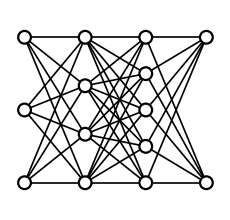

In [24]:
import matplotlib.pyplot as plt


def save_nn_icon(
    fig_name: str,
    layer_sizes=(4, 6, 4),
    node_radius=0.035,
    line_width=1.2,
    margin=0.10,
    dpi=600,
    formats=("svg", "png"),
):
    """
    Generate a simple neural network icon (fully-connected MLP schematic) and save as tight-cropped figure.

    Parameters
    ----------
    fig_name : str
        Output base filename without extension.
    layer_sizes : tuple[int]
        Number of nodes in each layer, e.g., (4, 6, 4).
    node_radius : float
        Circle radius in axis coordinates.
    line_width : float
        Width of connection lines.
    margin : float
        White margin around the drawing in axis coordinates.
    dpi : int
        DPI for PNG.
    formats : tuple[str]
        Any subset of ("png", "svg", "pdf").
    """

    # Styling: keep it clean and neutral for academic slides
    plt.rcParams.update({
        "font.family": "serif",
        "axes.linewidth": 0.0,
    })

    fig = plt.figure(figsize=(3.2, 2.0))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_aspect("equal")
    ax.axis("off")

    L = len(layer_sizes)
    if L < 2:
        raise ValueError("layer_sizes must contain at least 2 layers.")

    # Layer x positions in [0, 1]
    xs = [i / (L - 1) for i in range(L)]

    # Node y positions per layer, centered in [0, 1]
    layer_ys = []
    for n in layer_sizes:
        if n == 1:
            ys = [0.5]
        else:
            ys = [i / (n - 1) for i in range(n)]
        # compress slightly to leave room for margins
        ys = [margin + (1 - 2 * margin) * y for y in ys]
        layer_ys.append(ys)

    # Draw connections (edges) first (so nodes sit on top)
    for li in range(L - 1):
        x0, x1 = xs[li], xs[li + 1]
        for y0 in layer_ys[li]:
            for y1 in layer_ys[li + 1]:
                ax.plot([x0, x1], [y0, y1], linewidth=line_width, color="black", zorder=1)

    # Draw nodes
    for li in range(L):
        x = xs[li]
        for y in layer_ys[li]:
            circ = plt.Circle(
                (x, y),
                node_radius,
                facecolor="white",   # fill white
                edgecolor="black",   # black outline
                linewidth=1.6,
                zorder=2,
            )
            ax.add_patch(circ)

    # Tight view limits around drawing
    ax.set_xlim(-0.08, 1.08)
    ax.set_ylim(-0.05, 1.05)

    # Export
    for fmt in formats:
        fmt = fmt.lower()
        if fmt == "png":
            fig.savefig(f"{fig_name}.png", dpi=dpi, bbox_inches="tight", pad_inches=0)
        elif fmt in ("svg", "pdf"):
            fig.savefig(f"{fig_name}.{fmt}", bbox_inches="tight", pad_inches=0)
        else:
            raise ValueError(f"Unsupported format: {fmt}")
    plt.show()
    plt.close(fig)



# Example: a compact 3-layer icon
save_nn_icon(
    fig_name="nn_icon_mlp",
    layer_sizes=(3, 4, 5, 2),
    formats=("png",),
)


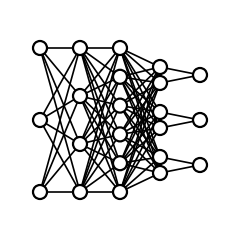

In [54]:
import matplotlib.pyplot as plt


def save_nn_icon_multihead(
    fig_name: str,
    trunk_sizes=(4, 6, 6),          # shared trunk layers
    head_sizes=(4, 2),              # per-head layers (each head starts from trunk output)
    num_heads: int = 3,
    node_radius=0.035,
    line_width=1.2,
    margin_x=0.10,
    margin_y=0.10,
    head_spread=0.5,               # vertical spread of heads (0..1)
    dpi=600,
    formats=("svg", "png"),
):
    """
    Multi-head MLP icon:
      - A shared trunk (fully-connected)
      - Branches into multiple heads (each fully-connected within itself)
      - Lines drawn first, nodes drawn second
      - White-filled nodes, black lines, no external deps beyond matplotlib
    """

    plt.rcParams.update({
        "font.family": "serif",
        "axes.linewidth": 0.0,
    })

    fig = plt.figure(figsize=(3.6, 2.2))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_aspect("equal")
    ax.axis("off")

    if len(trunk_sizes) < 2:
        raise ValueError("trunk_sizes must contain at least 2 layers.")
    if len(head_sizes) < 1:
        raise ValueError("head_sizes must contain at least 1 layer.")
    if num_heads < 1:
        raise ValueError("num_heads must be >= 1.")

    # ---- X positions: trunk then head layers ----
    trunk_L = len(trunk_sizes)
    head_L = len(head_sizes)
    total_L = trunk_L + head_L  # trunk layers + head layers (shared x positions for all heads)

    xs = [i / (total_L - 1) for i in range(total_L)]
    # Apply horizontal margin
    xs = [margin_x + (1 - 2 * margin_x) * x for x in xs]

    # ---- Y positions: trunk centered; heads separated vertically ----
    def layer_y_positions(n: int, y_center: float, y_span: float):
        if n == 1:
            return [y_center]
        ys01 = [i / (n - 1) for i in range(n)]
        return [y_center - 0.5 * y_span + y_span * y for y in ys01]

    # trunk y span uses available vertical space
    trunk_span = (1 - 2 * margin_y) * 0.90
    trunk_center = 0.5

    trunk_ys = [layer_y_positions(n, trunk_center, trunk_span) for n in trunk_sizes]

    # heads: centers distributed in a band around 0.5
    if num_heads == 1:
        head_centers = [0.5]
    else:
        band = head_spread * (1 - 1 * margin_y)
        head_centers = [
            0.5 - 0.5 * band + band * (k / (num_heads - 1))
            for k in range(num_heads)
        ]



    head_span = (1 - 2 * margin_y) * 0.1  # make each head more compact vertically
    heads_ys = []
    for hc in head_centers:
        heads_ys.append([layer_y_positions(n, hc, head_span) for n in head_sizes])

    # ---- Helper: draw fully-connected edges between two layers ----
    def draw_fc(x0, ys0, x1, ys1):
        for y0 in ys0:
            for y1 in ys1:
                ax.plot([x0, x1], [y0, y1], linewidth=line_width, color="black", zorder=1)

    # ---- Draw trunk edges first ----
    for li in range(trunk_L - 1):
        draw_fc(xs[li], trunk_ys[li], xs[li + 1], trunk_ys[li + 1])

    # ---- Draw branching: trunk last layer -> first layer of each head ----
    trunk_out_x = xs[trunk_L - 1]
    trunk_out_ys = trunk_ys[-1]
    head0_x = xs[trunk_L]  # first head layer x

    for h in range(num_heads):
        draw_fc(trunk_out_x, trunk_out_ys, head0_x, heads_ys[h][0])

    # ---- Draw each head's internal edges ----
    for h in range(num_heads):
        for li in range(head_L - 1):
            x0 = xs[trunk_L + li]
            x1 = xs[trunk_L + li + 1]
            draw_fc(x0, heads_ys[h][li], x1, heads_ys[h][li + 1])

    # ---- Draw nodes second (white fill) ----
    def draw_nodes(x, ys):
        for y in ys:
            ax.add_patch(
                plt.Circle(
                    (x, y),
                    node_radius,
                    facecolor="white",
                    edgecolor="black",
                    linewidth=1.6,
                    zorder=2,
                )
            )

    # trunk nodes
    for li in range(trunk_L):
        draw_nodes(xs[li], trunk_ys[li])

    # head nodes
    for h in range(num_heads):
        for li in range(head_L):
            draw_nodes(xs[trunk_L + li], heads_ys[h][li])

    # Tight view limits
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)

    # Export
    for fmt in formats:
        fmt = fmt.lower()
        if fmt == "png":
            fig.savefig(f"{fig_name}.png", dpi=dpi, bbox_inches="tight", pad_inches=0)
        elif fmt in ("svg", "pdf"):
            fig.savefig(f"{fig_name}.{fmt}", bbox_inches="tight", pad_inches=0)
        else:
            raise ValueError(f"Unsupported format: {fmt}")

    plt.show()
    plt.close(fig)



save_nn_icon_multihead(
    "nn_icon_multihead",
    trunk_sizes=(3, 4, 6),
    head_sizes=(2, 1),
    num_heads=3,
    formats=("png",),
)


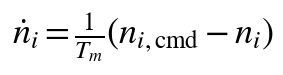

In [63]:
eq_motor_dynamics = (
    r"$"
    r"\dot{n}_i"
    r"="
    r"\frac{1}{T_m}"
    r"\left(n_{i,\mathrm{cmd}}-n_i\right)"
    r"$"
)

save_equation_figure(
    eq_motor_dynamics,
    "eqn_motor_speed_dynamics",
    fontsize=26,
    formats=("png",),
)


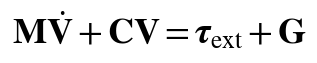

In [64]:
eq_lagrangian = (
    r"$"
    r"\mathbf{M}\dot{\mathbf{V}}"
    r"+"
    r"\mathbf{C}\mathbf{V}"
    r"="
    r"\boldsymbol{\tau}_{\mathrm{ext}}"
    r"+"
    r"\mathbf{G}"
    r"$"
)

save_equation_figure(
    eq_lagrangian,
    "eqn_rigid_body_dynamics",
    fontsize=26,
    formats=("png",),
)


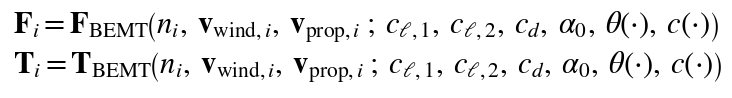

In [65]:
eq_FT_BEMT = (
    # ---- Force model ----
    r"$"
    r"\mathbf{F}_i"
    r"="
    r"\mathbf{F}_{\mathrm{BEMT}}\!\left("
    r"n_i,\;"
    r"\mathbf{v}_{\mathrm{wind},i},\;"
    r"\mathbf{v}_{\mathrm{prop},i}"
    r"\;;\;"
    r"c_{\ell,1},\;"
    r"c_{\ell,2},\;"
    r"c_d,\;"
    r"\alpha_0,\;"
    r"\theta(\cdot),\;"
    r"c(\cdot)"
    r"\right)"
    r"$"
    "\n"
    # ---- Torque model ----
    r"$"
    r"\mathbf{T}_i"
    r"="
    r"\mathbf{T}_{\mathrm{BEMT}}\!\left("
    r"n_i,\;"
    r"\mathbf{v}_{\mathrm{wind},i},\;"
    r"\mathbf{v}_{\mathrm{prop},i}"
    r"\;;\;"
    r"c_{\ell,1},\;"
    r"c_{\ell,2},\;"
    r"c_d,\;"
    r"\alpha_0,\;"
    r"\theta(\cdot),\;"
    r"c(\cdot)"
    r"\right)"
    r"$"
)

save_equation_figure(
    eq_FT_BEMT,
    "eqn_per_rotor_bemt_force_torque",
    fontsize=22,     # slightly smaller for two long lines
    pad=0.03,
    formats=("png",),
)


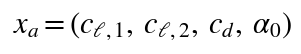

In [68]:
eq_x_a = (
    # ---- Force model ----
    r"$"
    r"x_a = (c_{\ell,1},\; c_{\ell,2},\; c_d,\; \alpha_0)"
    r"$"
)

save_equation_figure(
    eq_x_a,
    "eqn_x_a",
    fontsize=22,     # slightly smaller for two long lines
    pad=0.03,
    formats=("png",),
)
